In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
customers = pd.read_csv("E:\Customers.csv")

In [3]:
orders = pd.read_csv("E:\Orders.csv")
order_details = pd.read_csv("E:\OrderDetails.csv")

In [4]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   CustomerID  300 non-null    int64 
 1   Name        300 non-null    object
 2   Phone       300 non-null    int64 
 3   Address     300 non-null    object
 4   City        300 non-null    object
dtypes: int64(2), object(3)
memory usage: 11.8+ KB


In [5]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   OrderID           4000 non-null   int64 
 1   CustomerID        4000 non-null   int64 
 2   OrderDateTime     4000 non-null   object
 3   DeliveryDateTime  3924 non-null   object
 4   TotalAmount       4000 non-null   int64 
 5   DeliveryStatus    4000 non-null   object
dtypes: int64(3), object(3)
memory usage: 187.6+ KB


In [6]:
order_details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   OrderDetailsID  10000 non-null  int64 
 1   OrderID         10000 non-null  int64 
 2   ProductName     10000 non-null  object
 3   Quantity        10000 non-null  int64 
 4   PricePerUnit    10000 non-null  int64 
dtypes: int64(4), object(1)
memory usage: 390.8+ KB


In [9]:
customers.isnull().sum()

CustomerID    0
Name          0
Phone         0
Address       0
City          0
dtype: int64

In [10]:
orders.isnull().sum()

OrderID              0
CustomerID           0
OrderDateTime        0
DeliveryDateTime    76
TotalAmount          0
DeliveryStatus       0
dtype: int64

In [11]:
order_details.isnull().sum()

OrderDetailsID    0
OrderID           0
ProductName       0
Quantity          0
PricePerUnit      0
dtype: int64

In [12]:
customers.duplicated().sum()

0

In [13]:
orders.duplicated().sum()

0

In [14]:
order_details.duplicated().sum()

0

In [15]:
city_count = customers.groupby("City").agg({"CustomerID":"count"})
city_count

,CustomerID
City,
Ahmedabad,46
Bangalore,34
Delhi,37
Hyderabad,48
Jaipur,49
Mumbai,47
Pune,39


In [16]:
join_orders_customers = pd.merge(left = orders, right = customers, on = "CustomerID", how = "inner")
join_orders_customers

,OrderID,CustomerID,OrderDateTime,DeliveryDateTime,TotalAmount,DeliveryStatus,Name,Phone,Address,City
0,1,17,2024-11-17 22:12:56,2024-11-17 22:27:56,113,Delivered,Rohit Pandey,4625735153,"Malviya Nagar, Delhi",Delhi
1,12,17,2024-11-15 03:32:56,2024-11-15 03:42:56,1250,Delivered,Rohit Pandey,4625735153,"Malviya Nagar, Delhi",Delhi
2,60,17,2024-10-08 14:53:56,2024-10-08 15:03:56,524,Delivered,Rohit Pandey,4625735153,"Malviya Nagar, Delhi",Delhi
3,425,17,2024-10-03 16:39:56,2024-10-03 16:51:56,1223,Delivered,Rohit Pandey,4625735153,"Malviya Nagar, Delhi",Delhi
4,479,17,2024-11-07 03:05:56,2024-11-07 03:17:56,274,Delivered,Rohit Pandey,4625735153,"Malviya Nagar, Delhi",Delhi
...,...,...,...,...,...,...,...,...,...,...
3995,3764,185,2024-10-01 21:58:56,2024-10-01 22:11:56,562,Delivered,Ishani Joshi,3284627506,"Koramangala, Hyderabad",Pune
3996,3779,185,2024-10-04 14:58:56,2024-10-04 15:06:56,1318,Delivered,Ishani Joshi,3284627506,"Koramangala, Hyderabad",Pune
3997,3832,185,2024-11-02 22:54:56,2024-11-02 23:05:56,1389,Delivered,Ishani Joshi,3284627506,"Koramangala, Hyderabad",Pune
3998,3911,185,2024-10-29 10:01:56,2024-10-29 10:14:56,882,Delivered,Ishani Joshi,3284627506,"Koramangala, Hyderabad",Pune


In [21]:
revenue_city = join_orders_customers.groupby(["City","DeliveryStatus"]).agg({"OrderID":"count","TotalAmount":"sum"})
revenue_city

OrderID  TotalAmount
City      DeliveryStatus                      
Ahmedabad Cancelled             6         6578
          Delivered           592       475208
Bangalore Cancelled             9         5960
          Delivered           466       373445
Delhi     Cancelled            15        13225
          Delivered           486       383151
Hyderabad Cancelled            11         9541
          Delivered           620       512445
Jaipur    Cancelled            16        11799
          Delivered           642       515888
Mumbai    Cancelled             8         7303
          Delivered           618       504781
Pune      Cancelled            11         8898
          Delivered           500       392266

In [22]:
status = join_orders_customers.groupby("DeliveryStatus").agg({"TotalAmount":"sum"})
status

,TotalAmount
DeliveryStatus,
Cancelled,63304
Delivered,3157184


<function matplotlib.pyplot.show(close=None, block=None)>

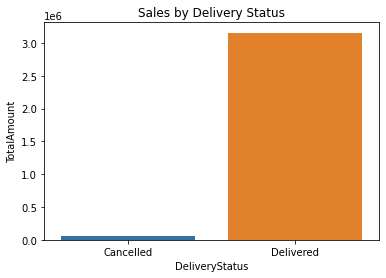

In [25]:
sns.barplot(x = status.index, y = "TotalAmount", data = status)
plt.title("Sales by Delivery Status")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

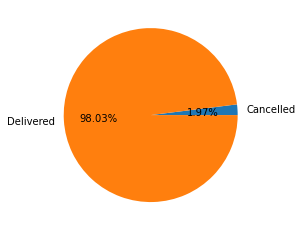

In [29]:
plt.pie(status["TotalAmount"], labels = status.index, autopct = "%1.2f%%")
plt.show

In [30]:
# Date time conversion
orders["OrderDateTime"] = pd.to_datetime(orders["OrderDateTime"])
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   OrderID           4000 non-null   int64         
 1   CustomerID        4000 non-null   int64         
 2   OrderDateTime     4000 non-null   datetime64[ns]
 3   DeliveryDateTime  3924 non-null   object        
 4   TotalAmount       4000 non-null   int64         
 5   DeliveryStatus    4000 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(2)
memory usage: 187.6+ KB
